# AI Epidemiology Phase Space Analysis (Demo)

A notebook to showcase phase space analysis for AI agent epidemiological models. It reveals system dynamics, critical points, and stability regions.

## Key Features

- **2D Phase Portraits**: Visualize dynamics in S-I, E-I, and other phase planes
- **3D Phase Space**: Full S-E-I dynamics with trajectories
- **Bifurcation Analysis**: Critical thresholds and parameter sensitivity
- **Nullcline Analysis**: Equilibrium curves and flow directions
- **Intervention Analysis**: Effects of real-time interventions on phase space

## Mathematical Framework

The SEIR system for AI agent security:

$$\frac{dS}{dt} = -\lambda S - \nu S + \mu N$$
$$\frac{dE}{dt} = \lambda S - (\sigma + \mu + \nu) E$$
$$\frac{dI}{dt} = \sigma E - (\gamma + \mu) I$$
$$\frac{dR}{dt} = \gamma I + \nu (S + E) - \mu R$$

where $\lambda = \beta I/N + \alpha$ is the force of infection

- $\beta$ Attack transmission rate, depends on attack sucees rate (ASR)
- $\sigma$ Rate from exposed to infected (1/incubation_time)
- $\gamma$ 1/detection_time
- $\mu$ Agent turnover rate
- $\nu$ Immunization/patching rate
- $\alpha$ External attack pressure
- $N$ Total agent population

The basic reproduction number $R_{0} = \beta/(\gamma+\mu)$ is outbreak potential

- $R_{0} > 1$: Epidemic spreads through the agent population

- $R_{0} < 1$: Attack dies out

In [2]:
import sys
import os
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from phase_space_analysis import PhaseSpaceAnalyzer
from ai_epidemiology_model import AIEpidemiologyModel
from bifurcation_analysis import BifurcationAnalyzer

# Set plotting style with fallback
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        # Use default matplotlib style if seaborn not available
        plt.style.use('default')

# Set color palette
try:
    sns.set_palette("husl")
except:
    pass  # Continue with default colors if seaborn not available

# Set random seed for reproducibility
np.random.seed(42)

print("AI Epidemiology Phase Space Analysis Demo")
print("=" * 50)

AI Epidemiology Phase Space Analysis Demo


## 1. Basic Phase Space Analysis

Let's start with a baseline scenario representing a moderately vulnerable AI agent population.

In [ ]:
# baseline parameters
baseline_params = {
    'beta': 0.3,    # attack transmission rate (moderate ASR)
    'sigma': 0.1,   # exposed to infected rate (incubation)
    'gamma': 0.05,  # detection/isolation rate
    'mu': 0.01,     # agent turnover rate
    'nu': 0.02,     # proactive patching rate
    'alpha': 0.001, # external attack pressure
    'N': 1000       # total agent population
}

analyzer = PhaseSpaceAnalyzer(baseline_params)

print(f"Baseline scenario:")
print(f"  Basic reproduction number R₀ = {analyzer.model.R0:.3f}")
print(f"  Epidemic threshold: {'EXCEEDED' if analyzer.model.R0 > 1 else 'not exceeded'}")

# equilibria and stability
equilibria = analyzer.bifurcation_analyzer.compute_equilibria(baseline_params)
stability = analyzer.bifurcation_analyzer.stability_analysis(baseline_params)

print(f"\nEquilibrium analysis:")
df_eq = equilibria['disease_free']
print(f"  Disease-free: S={df_eq['S']:.1f}, E={df_eq['E']:.1f}, I={df_eq['I']:.1f}, R={df_eq['R']:.1f}")
print(f"  Stability: {'Stable' if stability['disease_free']['stable'] else 'Unstable'}")

if equilibria['endemic']:
    en_eq = equilibria['endemic']
    print(f"  Endemic: S={en_eq['S']:.1f}, E={en_eq['E']:.1f}, I={en_eq['I']:.1f}, R={en_eq['R']:.1f}")
    print(f"  Stability: {'Stable' if stability['endemic']['stable'] else 'Unstable'}")

Baseline scenario:
  Basic reproduction number R₀ = 5.000
  Epidemic threshold: EXCEEDED

Equilibrium analysis:
  Disease-free: S=322.6, E=2.5, I=0.0, R=674.9
  Stability: Unstable
  Endemic: S=247.3, E=38.9, I=64.8, R=649.0
  Stability: Stable


## 2. 2D Phase Portraits

Phase portraits reveal the flow of the system and attracting/repelling regions.

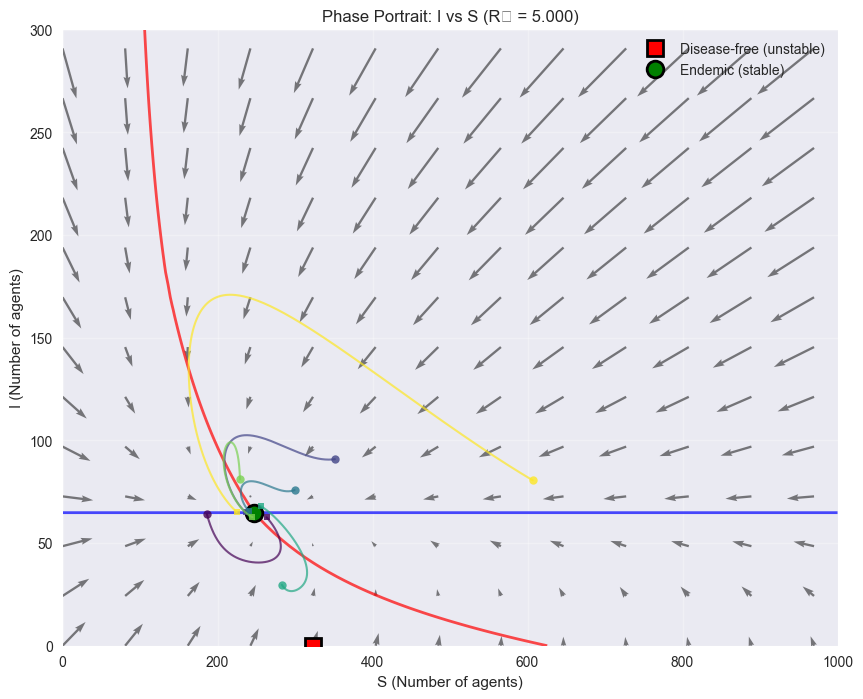

Key observations from S-I phase portrait:
  - Red line: dS/dt = 0 (susceptible nullcline)
  - Blue line: dI/dt = 0 (infected nullcline)
  - Arrows: Vector field showing flow direction
  - Circles: Stable equilibria, Squares: Unstable equilibria
  - Trajectories converge to stable equilibrium


In [17]:
# S vs I phase portrait with reduced complexity for demo


import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    
    fig1 = analyzer.plot_2d_phase_portrait('S', 'I', n_trajectories=6, t_max=120)  # Reduced from 10 trajectories
    plt.show()


print("Key observations from S-I phase portrait:")
print("  - Red line: dS/dt = 0 (susceptible nullcline)")
print("  - Blue line: dI/dt = 0 (infected nullcline)")
print("  - Arrows: Vector field showing flow direction")
print("  - Circles: Stable equilibria, Squares: Unstable equilibria")
print("  - Trajectories converge to stable equilibrium")

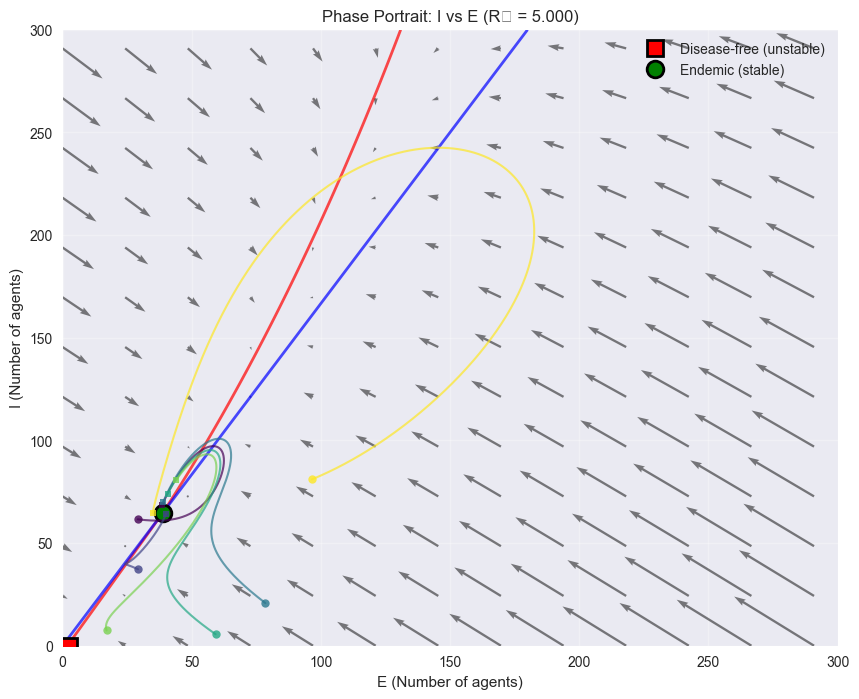

E-I phase portrait insights:
  - Shows relationship between exposed and infected populations
  - Reveals temporal progression from exposure to infection
  - Critical for understanding latency effects


In [ ]:
# E vs I phase portrait with reduced complexity for demo
fig2 = analyzer.plot_2d_phase_portrait('E', 'I', n_trajectories=6, t_max=120)  # Reduced complexity
plt.show()

print("E-I phase portrait insights:")
print("  - Shows relationship between exposed and infected populations")
print("  - Reveals temporal progression from exposure to infection")
print("  - Critical for understanding latency effects")

## 3. 3D Phase Space Visualization

The S-E-I dynamics in three-dimensional space.

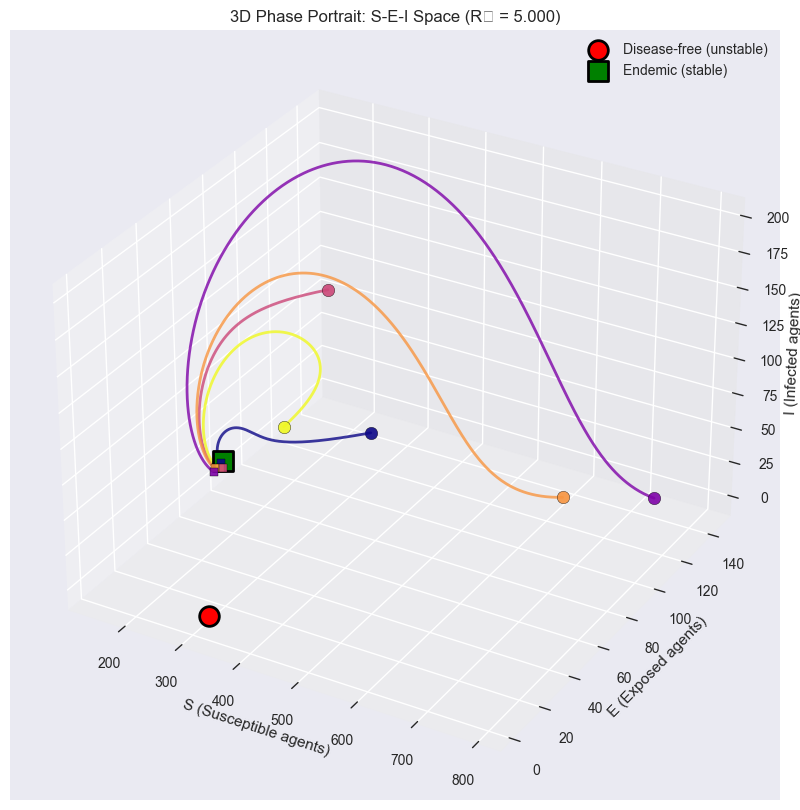

3D Phase Space Analysis:
  - Full system dynamics in S-E-I space
  - R coordinate determined by conservation: R = N - S - E - I
  - Trajectories show convergence to stable manifolds
  - Initial conditions determine approach to equilibrium


In [15]:
#  3D phase portrait with reduced complexity for demo
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    fig3 = analyzer.plot_3d_phase_portrait(n_trajectories=5, t_max=150)  # Reduced from 8 trajectories
    plt.show()


print("3D Phase Space Analysis:")
print("  - Full system dynamics in S-E-I space")
print("  - R coordinate determined by conservation: R = N - S - E - I")
print("  - Trajectories show convergence to stable manifolds")
print("  - Initial conditions determine approach to equilibrium")

## 4. Bifurcation Analysis

Critical parameter analysis revealing system transitions and thresholds.

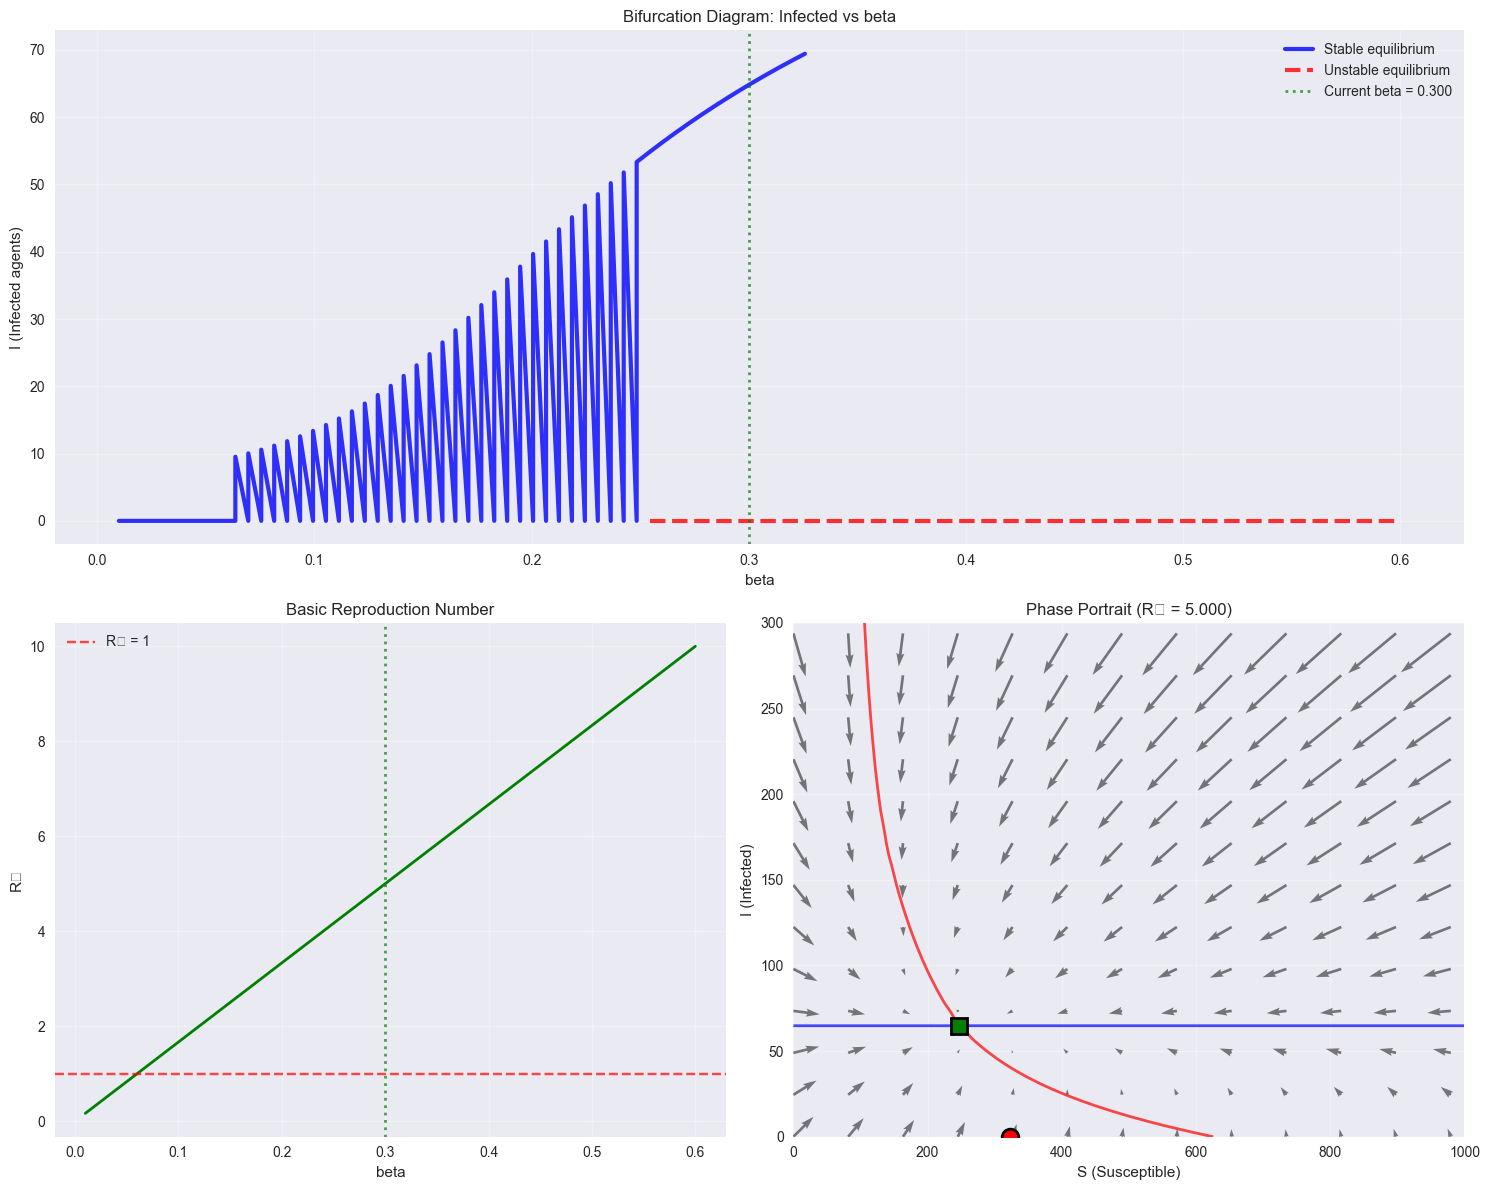

Bifurcation Analysis Results:
  - Top: Bifurcation diagram showing equilibrium branches
  - Bottom left: R₀ vs parameter showing epidemic threshold
  - Bottom right: Phase portrait at current parameter value
  - Critical bifurcation occurs when R_0 = 1


In [18]:
# bifurcation analysis
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    fig4 = analyzer.plot_bifurcation_with_phase_space('beta', [0.01, 0.6])
    plt.show()

print("Bifurcation Analysis Results:")
print("  - Top: Bifurcation diagram showing equilibrium branches")
print("  - Bottom left: R₀ vs parameter showing epidemic threshold") 
print("  - Bottom right: Phase portrait at current parameter value")
print("  - Critical bifurcation occurs when R_0 = 1")

## 5. Parameter Sensitivity Analysis

Compare different scenarios to understand parameter effects.

Low Threat: R_0 = 0.615 - Well-defended system with low ASR
High Threat: R_0 = 23.333 - Vulnerable system with high ASR
Rapid Response: R_0 = 1.154 - Strong incident response capabilities


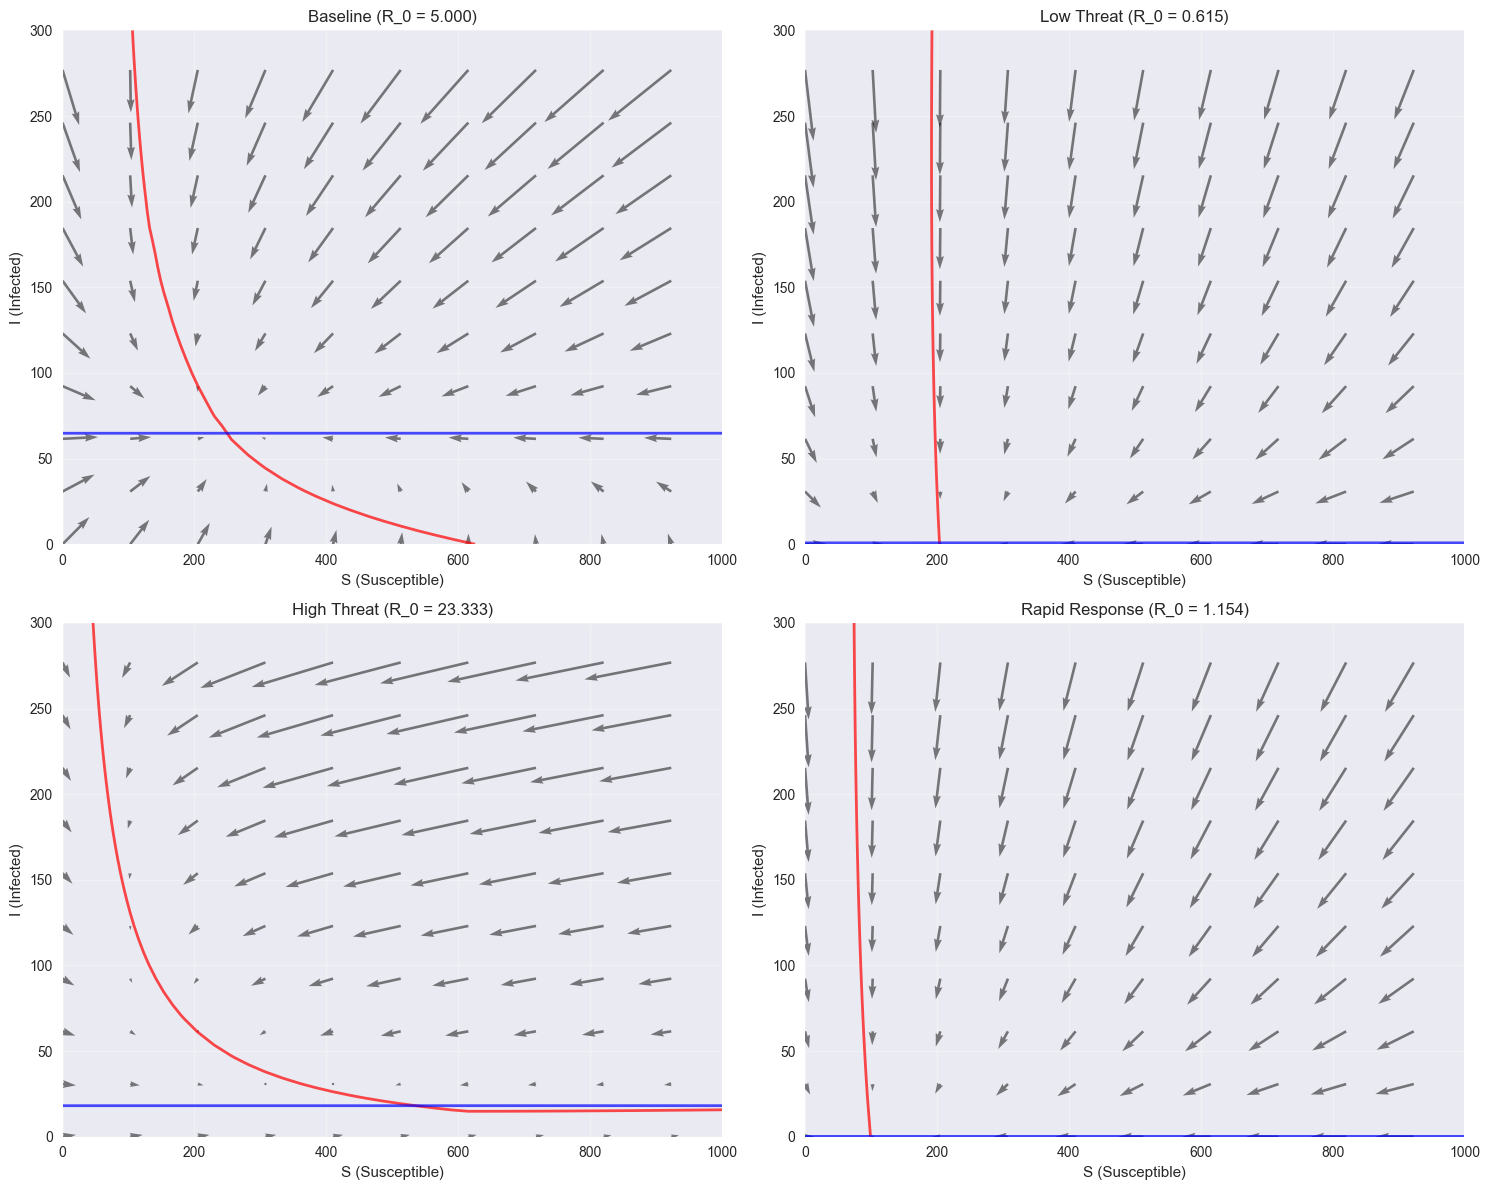

In [21]:

import matplotlib.font_manager as fm
fm.fontManager.addfont('/System/Library/Fonts/Supplemental/Arial Unicode.ttf')


# different scenarios
scenarios = {
    'Low Threat': {
        'beta': 0.08,   # Low attack success rate
        'gamma': 0.12,  # Fast detection
        'nu': 0.05,     # Good proactive patching
        'description': 'Well-defended system with low ASR'
    },
    'High Threat': {
        'beta': 0.7,    # High attack success rate
        'gamma': 0.02,  # Slow detection
        'nu': 0.005,    # Poor proactive patching
        'description': 'Vulnerable system with high ASR'
    },
    'Rapid Response': {
        'beta': 0.3,    # Moderate ASR
        'gamma': 0.25,  # Very fast detection
        'nu': 0.1,      # Aggressive patching
        'description': 'Strong incident response capabilities'
    }
}

# compare scenarios
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    # baseline in first subplot
    ax = axes[0]
    nullclines = analyzer.compute_nullclines('S', 'I', resolution=40)
    V1, V2 = nullclines['V1'], nullclines['V2']
    dV1_dt, dV2_dt = nullclines['dS_dt'], nullclines['dI_dt']

    ax.contour(V1, V2, dV1_dt, levels=[0], colors='red', linewidths=2, alpha=0.7)
    ax.contour(V1, V2, dV2_dt, levels=[0], colors='blue', linewidths=2, alpha=0.7)
    skip = 4
    ax.quiver(V1[::skip, ::skip], V2[::skip, ::skip], 
              dV1_dt[::skip, ::skip], dV2_dt[::skip, ::skip],
              alpha=0.5, scale=None, angles='xy', width=0.004)

    ax.set_title(f'Baseline (R_0 = {analyzer.model.R0:.3f})')
    ax.set_xlabel('S (Susceptible)')
    ax.set_ylabel('I (Infected)')
    ax.grid(True, alpha=0.3)

    # scenario comparisons
    for i, (name, scenario_params) in enumerate(scenarios.items(), 1):
        # update parameters
        full_params = baseline_params.copy()
        for key, value in scenario_params.items():
            if key in full_params:
                full_params[key] = value
        
        scenario_analyzer = PhaseSpaceAnalyzer(full_params)
        
        ax = axes[i]
        nullclines_sc = scenario_analyzer.compute_nullclines('S', 'I', resolution=40)
        V1_sc, V2_sc = nullclines_sc['V1'], nullclines_sc['V2']
        dV1_dt_sc, dV2_dt_sc = nullclines_sc['dS_dt'], nullclines_sc['dI_dt']
        
        ax.contour(V1_sc, V2_sc, dV1_dt_sc, levels=[0], colors='red', linewidths=2, alpha=0.7)
        ax.contour(V1_sc, V2_sc, dV2_dt_sc, levels=[0], colors='blue', linewidths=2, alpha=0.7)
        ax.quiver(V1_sc[::skip, ::skip], V2_sc[::skip, ::skip], 
                  dV1_dt_sc[::skip, ::skip], dV2_dt_sc[::skip, ::skip],
                  alpha=0.5, scale=None, angles='xy', width=0.004)
        
        ax.set_title(f'{name} (R_0 = {scenario_analyzer.model.R0:.3f})')
        ax.set_xlabel('S (Susceptible)')
        ax.set_ylabel('I (Infected)')
        ax.grid(True, alpha=0.3)
        
        print(f"{name}: R_0 = {scenario_analyzer.model.R0:.3f} - {scenario_params['description']}")

    plt.rcParams['font.family'] = 'Arial Unicode MS'
    plt.tight_layout()
    plt.show()

## 6. Intervention Analysis

Real-time intervention effects on system dynamics and phase space structure.

Intervention Strategy:
  - Network segmentation: β reduced by 80%
  - Enhanced monitoring: γ increased by 500%
  - Emergency patching: ν increased by 300%


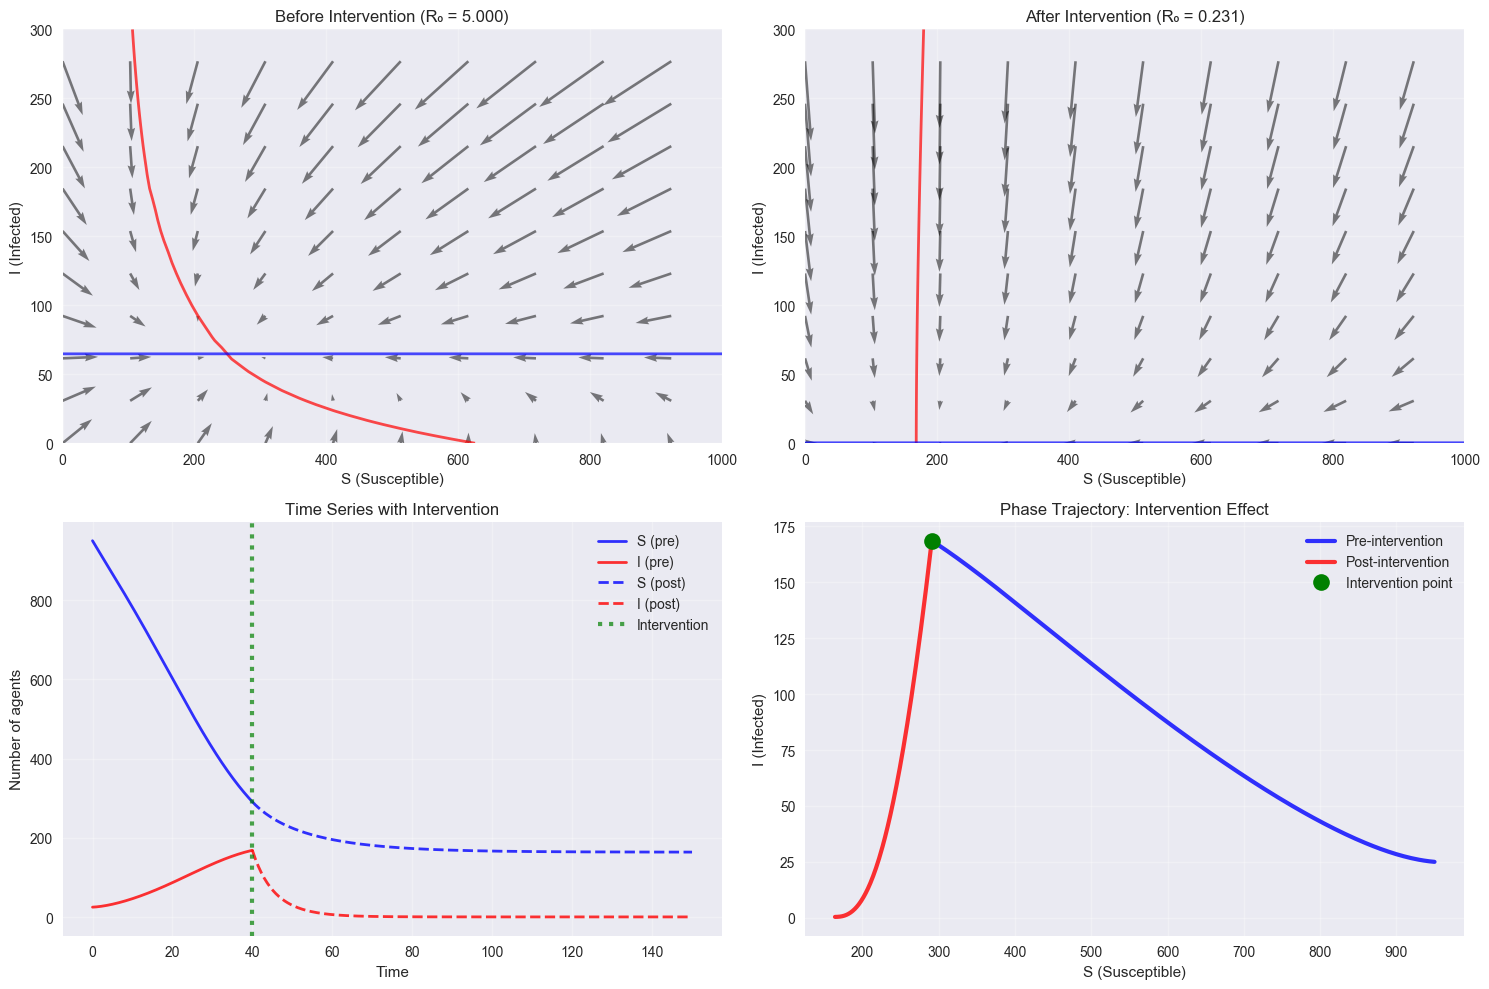


Intervention Analysis Results:
  Pre-intervention R_0: 5.000
  Post-intervention R_0: 0.231
  R_0 reduction: 95.4%
  System transitions from epidemic to controlled state


In [22]:
# intervention parameters
intervention_params = baseline_params.copy()
intervention_params['beta'] *= 0.2  # 80% reduction in attack transmission
intervention_params['gamma'] *= 5.0  # 5x faster detection and isolation
intervention_params['nu'] *= 3.0     # 3x faster proactive patching

print("Intervention Strategy:")
print(f"  - Network segmentation: β reduced by 80%")
print(f"  - Enhanced monitoring: γ increased by 500%")
print(f"  - Emergency patching: ν increased by 300%")

# intervention effects
fig5 = analyzer.intervention_phase_analysis(
    intervention_time=40,
    intervention_params=intervention_params,
    t_max=150
)
plt.show()

print("\nIntervention Analysis Results:")
post_model = AIEpidemiologyModel(**intervention_params)
print(f"  Pre-intervention R_0: {analyzer.model.R0:.3f}")
print(f"  Post-intervention R_0: {post_model.R0:.3f}")
print(f"  R_0 reduction: {(1 - post_model.R0/analyzer.model.R0)*100:.1f}%")
print(f"  System transitions from epidemic to controlled state")

## 7. Critical Threshold Analysis

Identify exact bifurcation points and intervention thresholds.

In [24]:
# find critical beta threshold where R_0 = 1
gamma_plus_mu = baseline_params['gamma'] + baseline_params['mu']
critical_beta = gamma_plus_mu  # R_0 = beta/(gamma+mu) = 1

print(f"Critical Analysis:")
print(f"  Current β = {baseline_params['beta']:.3f}")
print(f"  Critical β = {critical_beta:.3f} (where R_0 = 1)")
print(f"  Safety margin: {(baseline_params['beta'] - critical_beta)/critical_beta*100:.1f}%")

# requirements for different R_0 targets
targets = [0.9, 0.7, 0.5]
interventions = analyzer.bifurcation_analyzer.intervention_analysis

print(f"\nIntervention Requirements:")
for target in targets:
    required_beta = target * gamma_plus_mu
    reduction_needed = (1 - required_beta/baseline_params['beta']) * 100
    print(f"  For R₀ = {target}: Reduce β by {reduction_needed:.1f}% (to {required_beta:.3f})")

# sensitivity analysis
print(f"\nParameter Sensitivity (dR_0/dparameter):")
print(f"  dR0/dβ = {1/gamma_plus_mu:.3f} (positive - increase β increases R_0)")
print(f"  dR0/dγ = {-baseline_params['beta']/(gamma_plus_mu**2):.3f} (negative - increase γ decreases R_0)")
print(f"  Most effective intervention: Increase detection rate γ")

Critical Analysis:
  Current β = 0.300
  Critical β = 0.060 (where R_0 = 1)
  Safety margin: 400.0%

Intervention Requirements:
  For R₀ = 0.9: Reduce β by 82.0% (to 0.054)
  For R₀ = 0.7: Reduce β by 86.0% (to 0.042)
  For R₀ = 0.5: Reduce β by 90.0% (to 0.030)

Parameter Sensitivity (dR_0/dparameter):
  dR0/dβ = 16.667 (positive - increase β increases R_0)
  dR0/dγ = -83.333 (negative - increase γ decreases R_0)
  Most effective intervention: Increase detection rate γ
